# Assignment 3

- Name: **Arnab Sen**
- Roll: **510519006**
- Date: **Sept 5, 2022**

## (i) Download data

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
BASE_PATH = '/content/drive/MyDrive/Colab_Notebooks/ML_DRIVE/Assign_3/dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv(f"{BASE_PATH}/train_and_test2.csv")
print("Dataset shape:", dataset.shape)
print("Dataset columns:", dataset.columns)

Dataset shape: (1309, 28)
Dataset columns: Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [ ]:
cols_to_be_removed = ['Passengerid', 'zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'zero.15', 'zero.16', 'zero.17', 'zero.18']
dataset = dataset.drop(cols_to_be_removed, axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1309 non-null   float64
 1   Fare      1309 non-null   float64
 2   Sex       1309 non-null   int64  
 3   sibsp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Pclass    1309 non-null   int64  
 6   Embarked  1307 non-null   float64
 7   2urvived  1309 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 81.9 KB


In [ ]:
dataset.shape

(1309, 8)

In [ ]:
dataset.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


In [ ]:
encoded_cols = ["Pclass", "Embarked"]
dataset = pd.get_dummies(dataset, columns=encoded_cols)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           1309 non-null   float64
 1   Fare          1309 non-null   float64
 2   Sex           1309 non-null   int64  
 3   sibsp         1309 non-null   int64  
 4   Parch         1309 non-null   int64  
 5   2urvived      1309 non-null   int64  
 6   Pclass_1      1309 non-null   uint8  
 7   Pclass_2      1309 non-null   uint8  
 8   Pclass_3      1309 non-null   uint8  
 9   Embarked_0.0  1309 non-null   uint8  
 10  Embarked_1.0  1309 non-null   uint8  
 11  Embarked_2.0  1309 non-null   uint8  
dtypes: float64(2), int64(4), uint8(6)
memory usage: 69.2 KB


In [ ]:
X = dataset.drop('2urvived', axis=1)
y = dataset['2urvived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
print(f"Train Dataset Shape: X_train = {X_train.shape} y_train = {y_train.shape}")

Train Dataset Shape: X_train = (981, 11) y_train = (981,)


In [ ]:
print(f"Test Dataset Shape: X_test = {X_test.shape} y_test = {y_test.shape}")

Test Dataset Shape: X_test = (328, 11) y_test = (328,)


## Task 2

In [ ]:
def train_model_with_inv_regu(X_train, y_train, X_test, y_test, C=1.0):
  lr = LogisticRegression(max_iter = 10000, C=C)
  lr.fit(X_train, y_train)
  return lr.score(X_test, y_test)

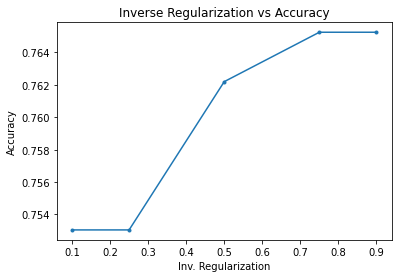

In [ ]:
inv_reg = [0.1, 0.25, 0.5, 0.75, 0.9]
accuracy = []

for ir in inv_reg:
  accuracy.append(train_model_with_inv_regu(X_train, y_train, X_test, y_test, ir))

plt.plot(inv_reg, accuracy, '.-')
plt.title("Inverse Regularization vs Accuracy")
plt.xlabel("Inv. Regularization")
plt.ylabel("Accuracy")
plt.show()

## Task 3

In [ ]:
def classifierHelper(
    X_train,
    y_train,
    X_test,
    y_test,
    max_depth
):

  max_depths = range(1, max_depth+1)
  accuracies = []

  for md in max_depths:
    classifier_model = DecisionTreeClassifier(max_depth=md).fit(X_train, y_train)
    accuracy = classifier_model.score(X_test, y_test)
    accuracies.append(accuracy)
  
  return [max_depths, accuracies]

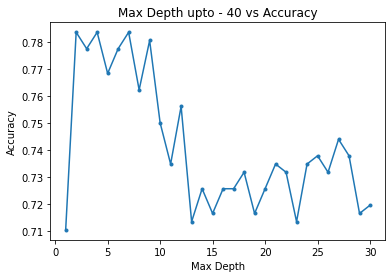

In [ ]:
result = classifierHelper(X_train, y_train, X_test, y_test, 30)
plt.plot(result[0], result[1], ".-")
plt.title(f"Max Depth upto - {40} vs Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()